**Exploratory Data Analysis of the Titanic Dataset**
[comment]: <> (Display text to left)
<img style="float: left;" src="titanic.png">


In [ ]:
**Preparation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
t = pd.read_csv('titanic_data.csv')

Get acquainted with the data. 

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
                
Further information available here: https://www.kaggle.com/c/titanic/data.                

In [3]:
t.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Twice as many males as females**

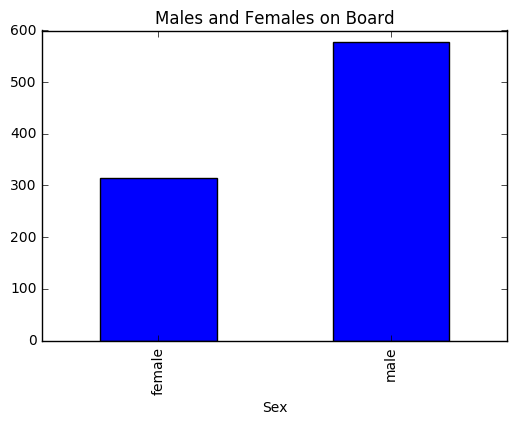

In [153]:
p = t.groupby('Sex')['Survived'].count().plot(kind='bar')
plt.title('Males and Females on Board')
plt.show()

**Women survive at a much higher rate than men.**

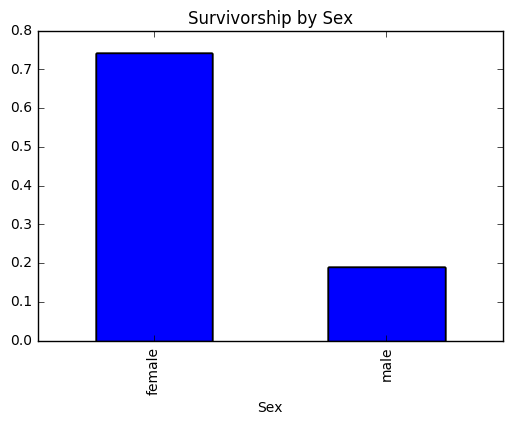

In [21]:

p = t.groupby('Sex')['Survived'].mean().plot(kind='bar')
#plt.ylabel('Survival Rate')
#plt.set_ylabel('blah') 
plt.title('Survivorship by Sex')
plt.show()

**How accurate would a single-level classification tree (male vs. female) be?**

In [160]:
m = t.groupby('Sex')['Survived'].mean()
c = t.groupby('Sex')['Survived'].count()
#At a high level, the next line of code will take one minus the sum the differences between the predicted and actual (error).
accuracy = 1 - (sum(pd.Series(1).repeat(c[0]) - m[0]) + sum(pd.Series(0).repeat(c[1]) + m[1])) / len(t) 
#If the above code seems opaque, try examining the individual "c" and "m" objects above. 
#Next view the elements (c[0], c[1], m[0] and m[1]).
print "{0:.1f}%".format(accuracy * 100)

78.7%


**Turn age into a categorical variable for plotting. **

In [50]:
t['AgeEven'] = t.Age // 2 * 2

**Boys survive better than men. Female survivorship is high across age groups.**


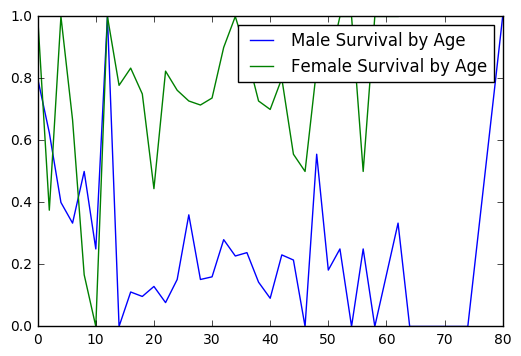

In [15]:
t['Child'] = t.Age <= 14 #14 is a reasonable cutoff for childhood (see graph below).
f = t[t.Sex == 'female'] #split out male and female, should we use the same cutoff be used for male and female?
m = t[t.Sex == 'male']
fa = f.groupby('AgeEven')['Survived'].mean()
ma = m.groupby('AgeEven')['Survived'].mean()
plt.plot(ma, label='Male Survival by Age')
plt.plot(fa, label='Female Survival by Age')
plt.legend()
plt.show()

**Females traveling third class survive at a much lower rate than first and second class passengers.**

In [111]:
# m = t.groupby(['Sex', 'Pclass'])['Survived'].mean()
# c = t.groupby(['Sex', 'Pclass'])['Age'].count() / len(t) # A lot of men and women travelling third class. Could be some potential here
# #pd.merge(m,c, on=['Sex', 'Pclass'])
# dfm = pd.DataFrame(m) #, columns = ['Sex', 'Pclass', 'mean'])
# dfc = pd.DataFrame(c)
# #pd.merge(dfm, dfc, on=['Sex', 'Pclass'])
# dfm
pd.options.display.float_format = '{:3,.0f}%'.format
s = t.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'count'])
s['Mean'] = s['mean'] * 100
s['Population'] = (s['count'] / len(t)) * 100
s[['Mean', 'Population']]

Mean  Population
Sex    Pclass                  
female 1        97%         11%
       2        92%          9%
       3        50%         16%
male   1        37%         14%
       2        16%         12%
       3        14%         39%

**Females traveling third-class survive at a rate of 50% and constitute 16% of the population.** 
Subdivide this population by the number of parents and children on board. As you see, survivorship increases from 50% to 59% for females traveling third-class with no parents or children aboard.

In [150]:
f = t[t.Sex == 'female'] #split out male and female, should the same cutoff be used for male and female
m = t[t.Sex == 'male']

f = f.groupby(['Pclass', 'Parch'])['Survived'].agg(['mean', 'count'])
f['Survival Rate'] = f['mean'] * 100
f['Percent of Total Population'] = (f['count'] / len(t)) * 100
f[['Survival Rate', 'Percent of Total Population']]

Survival Rate  Percent of Total Population
Pclass Parch                                            
1      0                98%                           7%
       1               100%                           2%
       2                85%                           1%
2      0                89%                           5%
       1                94%                           2%
       2               100%                           1%
       3               100%                           0%
3      0                59%                          10%
       1                48%                           3%
       2                32%                           3%
       3                50%                           0%
       4                 0%                           0%
       5                25%                           0%
       6                 0%                           0%

In [149]:
m1 = m.groupby(['Child', 'Pclass'])['Survived'].agg(['mean', 'count']) #new object name "m1" to ensure unique column names
m1['Survival Rate'] = m1['mean'] * 100
m1['Percent of Total Population'] = (m1['count'] / len(t)) * 100
m1[['Survival Rate', 'Percent of Total Population']]

Survival Rate  Percent of Total Population
Child Pclass                                            
False 1                 35%                          13%
      2                  8%                          11%
      3                 12%                          36%
True  1                100%                           0%
      2                100%                           1%
      3                 33%                           3%

Now it is **your** turn. What will you analyze next? Type your code in the "In [ ]:" box below, then press Shift + Enter to see the results.